## Importing libraries

In [54]:
import numpy as np
import pylab as pl
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import rand_score, adjusted_rand_score


## 1 Loading the data

In [55]:
temper_data = np.load('temper.npz')
x1 = temper_data['data'][:, :12]  # Extract only the first 12 columns (temperature data)
villes = temper_data['villes']  # City names
coordinates =temper_data['data'][:, 12:]
varname = temper_data['varname']  # Variable names

digits_data = np.load('digits.npz')
x2 = digits_data['x'] / 255.0 
x2_test = digits_data['xt'] / 255.0

### Quick eda

In [ ]:
print("Temperature data shape:", x1.shape)
print("Cities:", villes)
print("Variable names:", varname[:12]) 
print("First few temperature values:")
print(x1[:5, :5])
temp_means = np.mean(x1, axis=0)
print("\nMean temperature values for each month:")
for i, month_mean in enumerate(temp_means):
    print(f"Month {i+1}: {month_mean:.2f}")

Temperature data shape: (15, 12)
Cities: ['Bordeaux' 'Brest' 'Clermont-Ferrand' 'Grenoble' 'Lille' 'Lyon'
 'Marseille' 'Montpellier' 'Nantes' 'Nice' 'Paris' 'Rennes' 'Strasbourg'
 'Toulouse' 'Vichy']
Variable names: ['January' 'February' 'March' 'April' 'May' 'June' 'July' 'August'
 'September' 'October' 'November' 'December']

First few temperature values:
[[ 5.6  6.6 10.3 12.8 15.8]
 [ 6.1  5.8  7.8  9.2 11.6]
 [ 2.6  3.7  7.5 10.3 13.8]
 [ 1.5  3.2  7.7 10.6 14.5]
 [ 2.4  2.9  6.   8.9 12.4]]

Mean temperature values for each month:
Month 1: 3.97
Month 2: 4.83
Month 3: 8.23
Month 4: 10.98
Month 5: 14.43
Month 6: 17.83
Month 7: 19.83
Month 8: 19.57
Month 9: 16.99
Month 10: 12.32
Month 11: 7.93
Month 12: 4.85


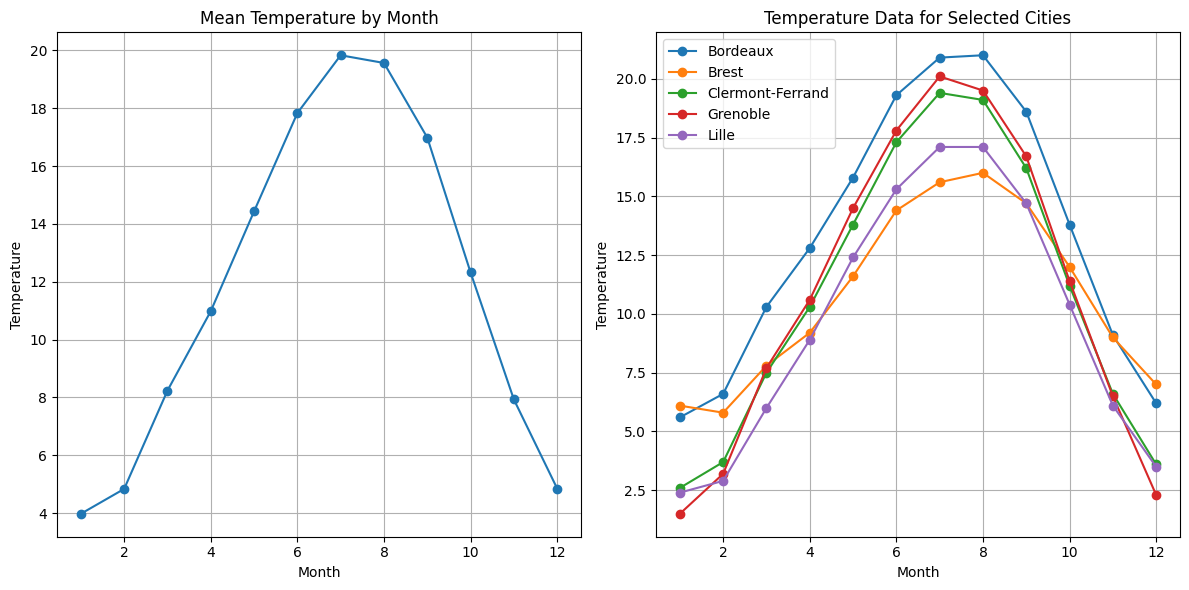

In [71]:
pl.figure(figsize=(12, 6))
pl.subplot(1, 2, 1)
pl.plot(range(1, 13), temp_means, 'o-')
pl.title('Mean Temperature by Month')
pl.xlabel('Month')
pl.ylabel('Temperature')
pl.grid(True)

pl.subplot(1, 2, 2)
for i in range(min(5, len(villes))):
    pl.plot(range(1, 13), x1[i, :], 'o-', label=villes[i])
pl.title('Temperature Data for Selected Cities')
pl.xlabel('Month')
pl.ylabel('Temperature')
pl.legend()
pl.grid(True)
pl.tight_layout()
pl.show()

Digits data shape: (3000, 784)
Digits test data shape: (1500, 784)
Training labels shape: (3000, 1)
Test labels shape: (1500, 1)
Unique digits in training set: [1 7 8]
Unique digits in test set: [1 7 8]


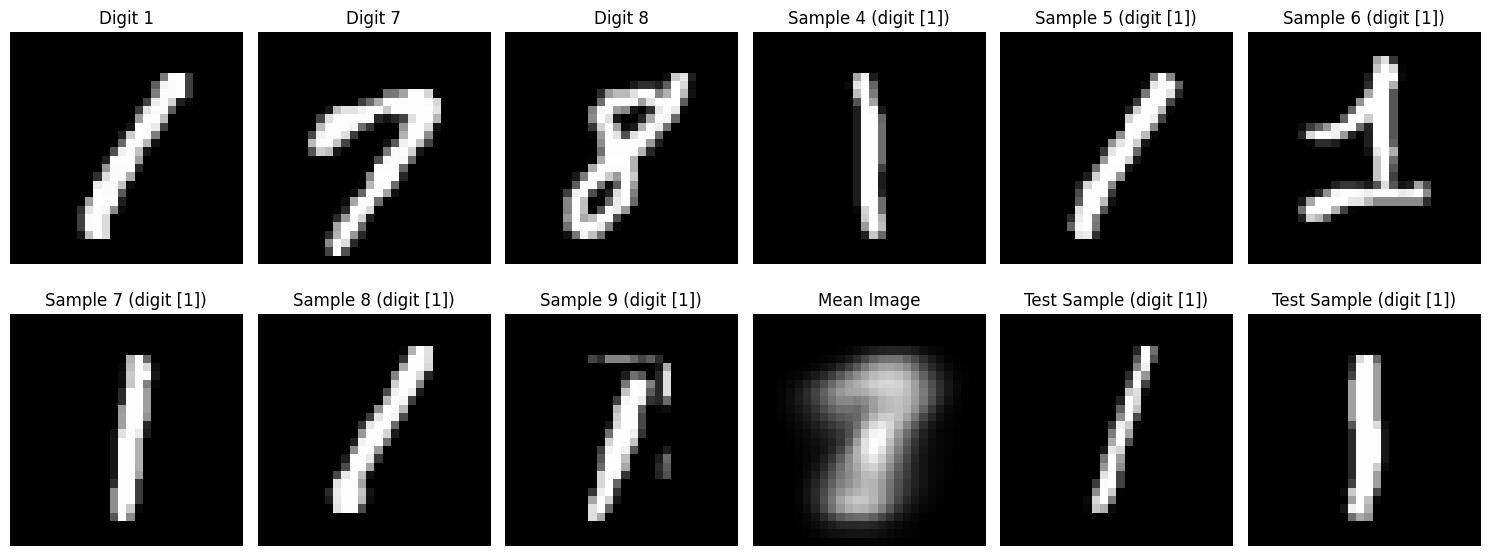

In [73]:
print("Digits data shape:", x2.shape)
print("Digits test data shape:", x2_test.shape)

y2 = digits_data['y']  # Training labels
y2_test = digits_data['yt']  # Test labels

print("Training labels shape:", y2.shape)
print("Test labels shape:", y2_test.shape)
print("Unique digits in training set:", np.unique(y2))
print("Unique digits in test set:", np.unique(y2_test))

digits_mean = np.mean(x2, axis=0)

pl.figure(figsize=(15, 6))

unique_digits = np.unique(y2)
for i, digit in enumerate(unique_digits):
    # Find first occurrence of each digit
    digit_idx = np.where(y2 == digit)[0][0]
    pl.subplot(2, 6, i+1)
    pl.imshow(x2[digit_idx].reshape(28, 28), cmap='gray')
    pl.title(f'Digit {digit}')
    pl.axis('off')

# Show a few more examples
for i in range(3, 9):
    pl.subplot(2, 6, i+1)
    pl.imshow(x2[i].reshape(28, 28), cmap='gray')
    pl.title(f'Sample {i+1} (digit {y2[i]})')
    pl.axis('off')

pl.subplot(2, 6, 10)
pl.imshow(digits_mean.reshape(28, 28), cmap='gray')
pl.title('Mean Image')
pl.axis('off')

pl.subplot(2, 6, 11)
pl.imshow(x2_test[0].reshape(28, 28), cmap='gray')
pl.title(f'Test Sample (digit {y2_test[0]})')
pl.axis('off')

pl.subplot(2, 6, 12)
pl.imshow(x2_test[10].reshape(28, 28), cmap='gray')
pl.title(f'Test Sample (digit {y2_test[10]})')
pl.axis('off')

pl.tight_layout()
pl.show()


## 2. Clustering

2.1 K-means for both datasets (K = 3)

In [59]:
RANDOM_STATE = 42

# Temperature dataset
k_temp = 3
kmeans_temp = KMeans(n_clusters=k_temp, n_init=10, random_state=RANDOM_STATE)
temp_labels = kmeans_temp.fit_predict(x1)
temp_centroids = kmeans_temp.cluster_centers_

# Digits dataset
k_digits = 3
kmeans_digits = KMeans(n_clusters=k_digits, n_init=10, random_state=RANDOM_STATE)
digits_labels = kmeans_digits.fit_predict(x2)
digits_centroids = kmeans_digits.cluster_centers_

### Temperature dataset

Cluster 0 (7 cities): Clermont-Ferrand, Grenoble, Lille, Lyon, Paris, Strasbourg, Vichy
Cluster 1 (5 cities): Bordeaux, Marseille, Montpellier, Nice, Toulouse
Cluster 2 (3 cities): Brest, Nantes, Rennes


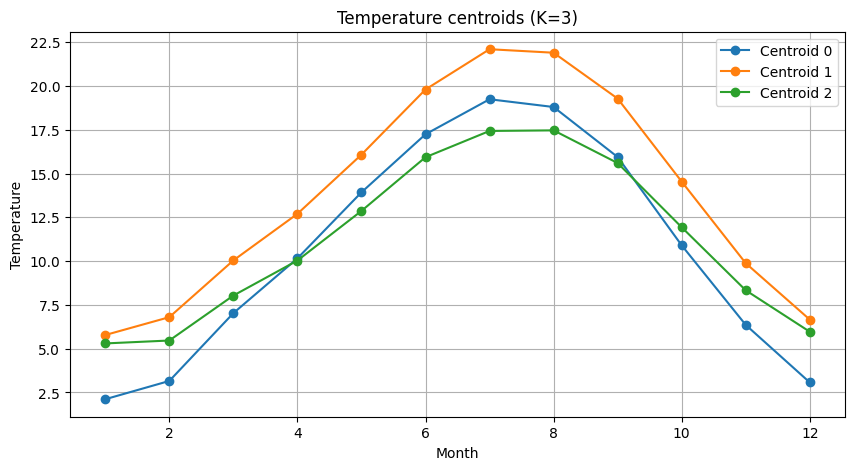

In [60]:
# list cities per cluster
clusters_to_cities = {c: [] for c in range(k_temp)}
for idx, lab in enumerate(temp_labels):
    clusters_to_cities[lab].append(villes[idx])

for c in range(k_temp):
    print(f"Cluster {c} ({len(clusters_to_cities[c])} cities): {', '.join(clusters_to_cities[c])}")

months = [str(m) for m in range(1, 13)]

pl.figure(figsize=(10, 5))
for c in range(k_temp):
    pl.plot(range(1, 13), temp_centroids[c], 'o-', label=f'Centroid {c}')
pl.title('Temperature centroids (K=3)')
pl.xlabel('Month')
pl.ylabel('Temperature')
pl.legend()
pl.grid(True)
pl.show()

**Geographical position for the cities :**

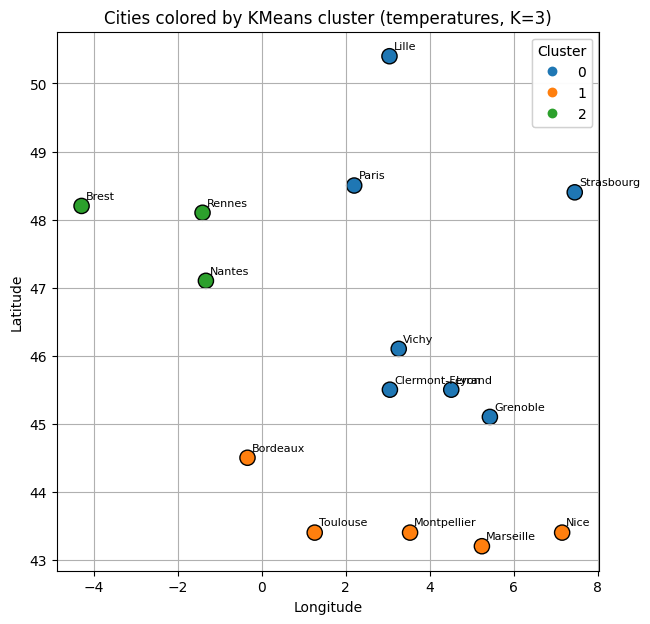

In [79]:
lats, lons, colors = [], [], []
for i, city in enumerate(villes):
    lat, lon = coordinates[i]
    lats.append(lat)
    lons.append(lon)
    colors.append(temp_labels[i])

pl.figure(figsize=(7, 7))
scatter = pl.scatter(lons, lats, c=colors, cmap='tab10', s=120, edgecolor='k',vmax=9)
for i, city in enumerate(villes):
    pl.text(lons[i] + 0.1, lats[i] + 0.1, str(city), fontsize=8)
pl.xlabel('Longitude')
pl.ylabel('Latitude')
pl.title('Cities colored by KMeans cluster (temperatures, K=3)')
legend1 = pl.legend(*scatter.legend_elements(), title="Cluster")
pl.gca().add_artist(legend1)
pl.grid(True)
pl.show()

> **2.2.1** 
Looking at the cities in each cluster, the K-means clustering appears to make geographical sense:

**Cluster 0 (7 cities): Clermont-Ferrand, Grenoble, Lille, Lyon, Paris, Strasbourg, Vichy**

    - These cities are mostly located in continental/inland France with more continental climate patterns

    - They experience colder winters and more temperature variation throughout the year

**Cluster 1 (5 cities): Bordeaux, Marseille, Montpellier, Nice, Toulouse**

    - These cities are located in southern France along the Mediterranean coast and Atlantic southwest

    - They have warmer, more Mediterranean climate with milder winters and hot summers

**Cluster 2 (3 cities): Brest, Nantes, Rennes**

    - These cities are all located in western France (Brittany region)
    
    - They experience oceanic climate with mild temperatures year-round due to maritime influence

> ==> The clustering groups cities with similar temperature patterns based on their geographical location and climate zones. **so the clustering make sens**

### Digits dataset

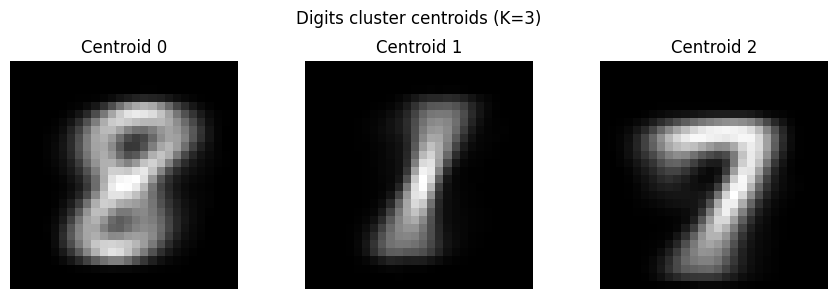

In [62]:
pl.figure(figsize=(9, 3))
for c in range(k_digits):
    pl.subplot(1, k_digits, c+1)
    pl.imshow(digits_centroids[c].reshape(28, 28), cmap='gray')
    pl.title(f'Centroid {c}')
    pl.axis('off')
pl.suptitle('Digits cluster centroids (K=3)')
pl.tight_layout()
pl.show()

a perfect clustering would be piecewise constant by segments.

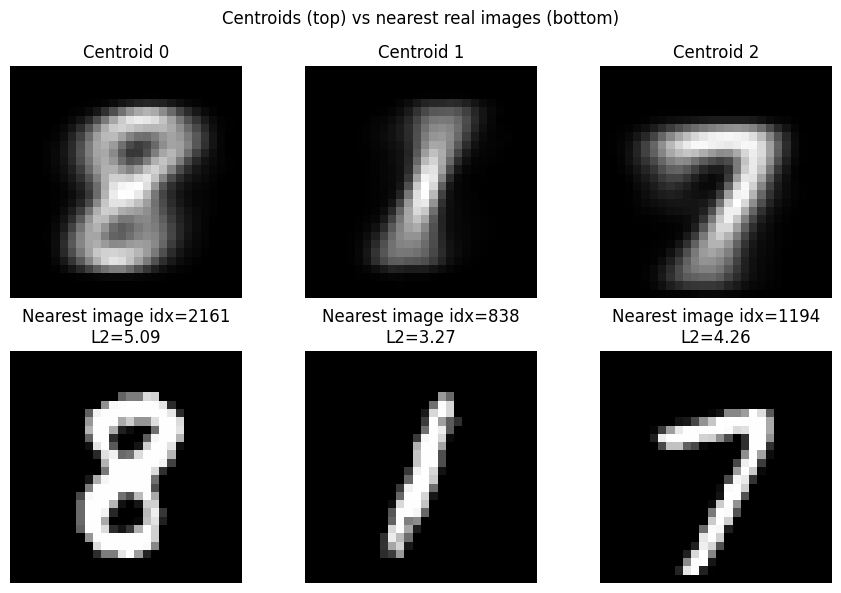

In [63]:
# Find nearest training image to each centroid
from sklearn.metrics import pairwise_distances_argmin_min

nearest_idx, nearest_dist = pairwise_distances_argmin_min(digits_centroids, x2)

pl.figure(figsize=(3*k_digits, 6))
for c in range(k_digits):
    pl.subplot(2, k_digits, c+1)
    pl.imshow(digits_centroids[c].reshape(28, 28), cmap='gray')
    pl.title(f'Centroid {c}')
    pl.axis('off')

    pl.subplot(2, k_digits, k_digits + c + 1)
    pl.imshow(x2[nearest_idx[c]].reshape(28, 28), cmap='gray')
    title = f'Nearest image idx={nearest_idx[c]}\nL2={nearest_dist[c]:.2f}'
    pl.title(title)
    pl.axis('off')

pl.suptitle('Centroids (top) vs nearest real images (bottom)')
pl.tight_layout()
pl.show()

2.3.1 
> Centroids are averages and rarely match a single real image. Nearest real images are sharper and show actual digits; **centroids look blurred, so they are not true images.**

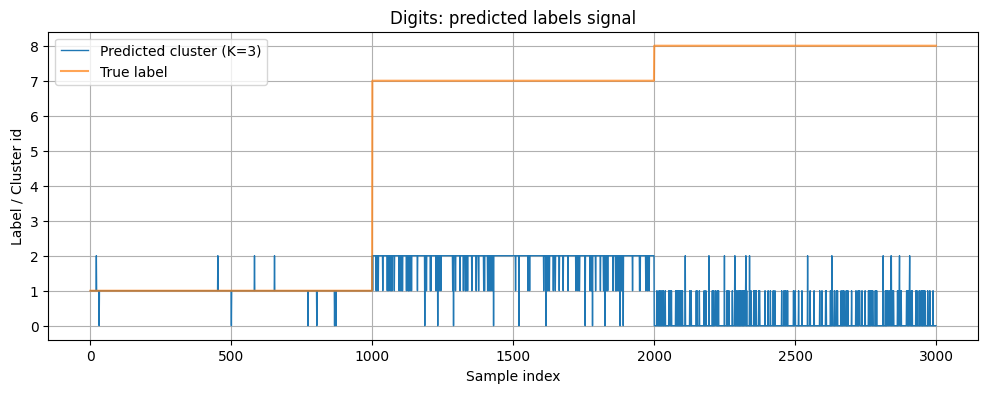

In [64]:
pl.figure(figsize=(12, 4))
pl.plot(digits_labels, label='Predicted cluster (K=3)', linewidth=1)
if true_y is not None:
    pl.plot(true_y, label='True label', alpha=0.7)
pl.title('Digits: predicted labels signal')
pl.xlabel('Sample index')
pl.ylabel('Label / Cluster id')
pl.legend()
pl.grid(True)
pl.show()

2.3.2
> The predicted labels are not perfectly piecewise constant; deviations indicate clusters mixing multiple classes or class transitions in ordering.

2.3.3

In [65]:
rs = rand_score(true_y.ravel(), digits_labels)
ars = adjusted_rand_score(true_y.ravel(), digits_labels)
print(f'Rand score = {rs:.4f}, Adjusted Rand score = {ars:.4f}')

Rand score = 0.8812, Adjusted Rand score = 0.7345


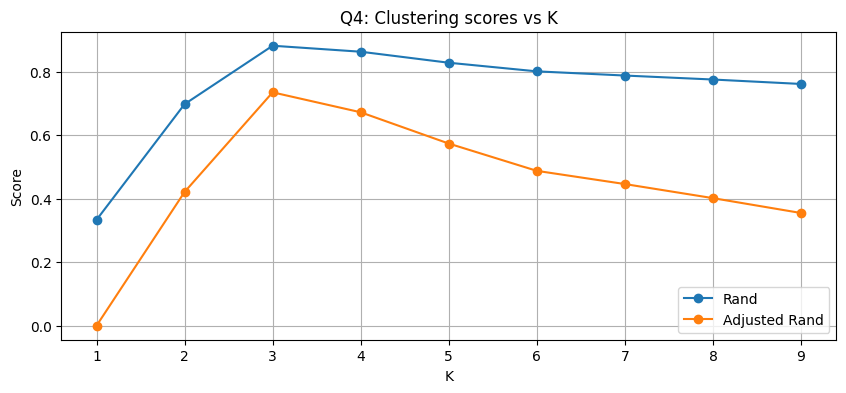

Best K by Adjusted Rand = 3 with score 0.7345.


In [70]:
Ks = list(range(1, 10))
rand_scores = []
adj_rand_scores = []

for K in Ks:
    km = KMeans(n_clusters=K, n_init=10, random_state=RANDOM_STATE)
    labs = km.fit_predict(x2)
    rand_scores.append(rand_score(true_y.ravel(), labs))
    adj_rand_scores.append(adjusted_rand_score(true_y.ravel(), labs))

pl.figure(figsize=(10, 4))
pl.plot(Ks, rand_scores, 'o-', label='Rand')
pl.plot(Ks, adj_rand_scores, 'o-', label='Adjusted Rand')
pl.xticks(Ks)
pl.xlabel('K')
pl.ylabel('Score')
pl.title('Q4: Clustering scores vs K')
pl.grid(True)
pl.legend()
pl.show()


best_idx = int(np.nanargmax(adj_rand_scores))
best_K = Ks[best_idx]
print(f'Best K by Adjusted Rand = {best_K} with score {adj_rand_scores[best_idx]:.4f}.')

The best K is 3 with an Adjusted Rand score of 0.7345. This makes sense because K=3 is close to the true number of classes, allowing clusters to better align with actual digit classes. When K is too small, different digit classes get merged into the same cluster. When K is too large, individual digit classes get split across multiple clusters. Both scenarios reduce the Adjusted Rand Index.


## 3. Density estimation

### Temperature dataset

3.1.1 Fit GMM with K=2 (diag) on temperature and plot means


Fitted GMM (temperature) with K=2, diag covariance
Weights: [0.667 0.333]


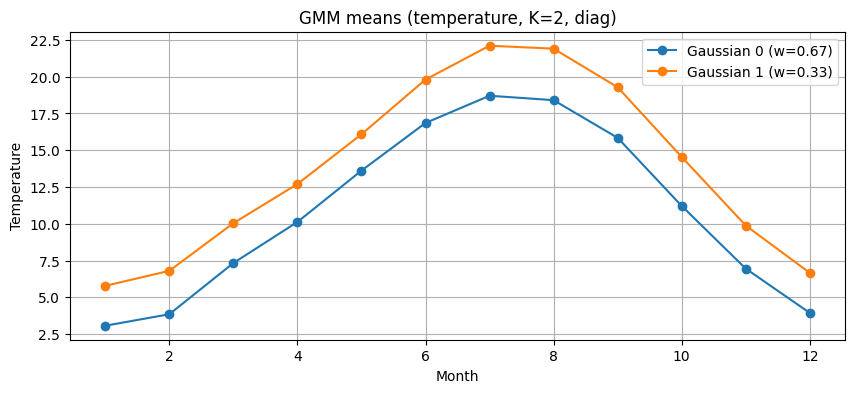

In [75]:
from sklearn.mixture import GaussianMixture

K_temp = 2
gmm_temp = GaussianMixture(n_components=K_temp, covariance_type='diag', random_state=RANDOM_STATE)
gmm_temp.fit(x1)

means_temp = gmm_temp.means_  # shape (K, 12)
weights_temp = gmm_temp.weights_

print('Fitted GMM (temperature) with K=2, diag covariance')
print('Weights:', np.round(weights_temp, 3))

pl.figure(figsize=(10, 4))
for k in range(K_temp):
    pl.plot(range(1, 13), means_temp[k], 'o-', label=f'Gaussian {k} (w={weights_temp[k]:.2f})')
pl.title('GMM means (temperature, K=2, diag)')
pl.xlabel('Month')
pl.ylabel('Temperature')
pl.legend()
pl.grid(True)
pl.show()

> Means represent prototypical annual temperature profiles captured by each Gaussian.

3.1.2 Model selection: compare K and covariance types using BIC/AIC

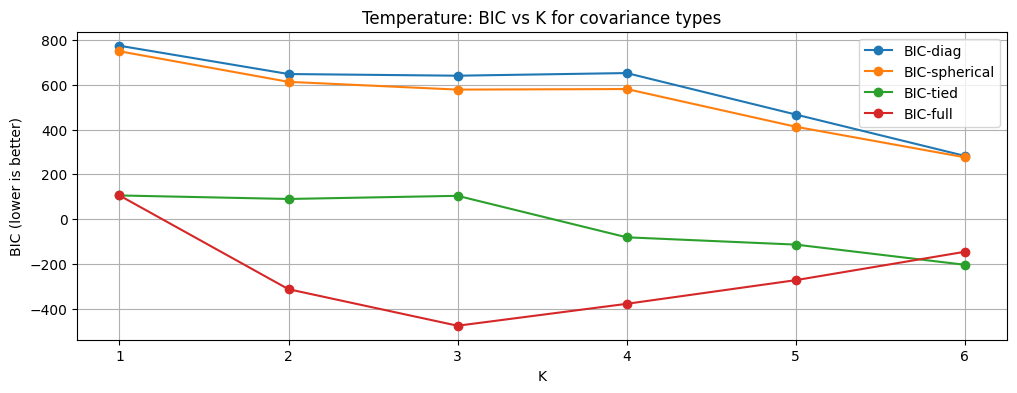

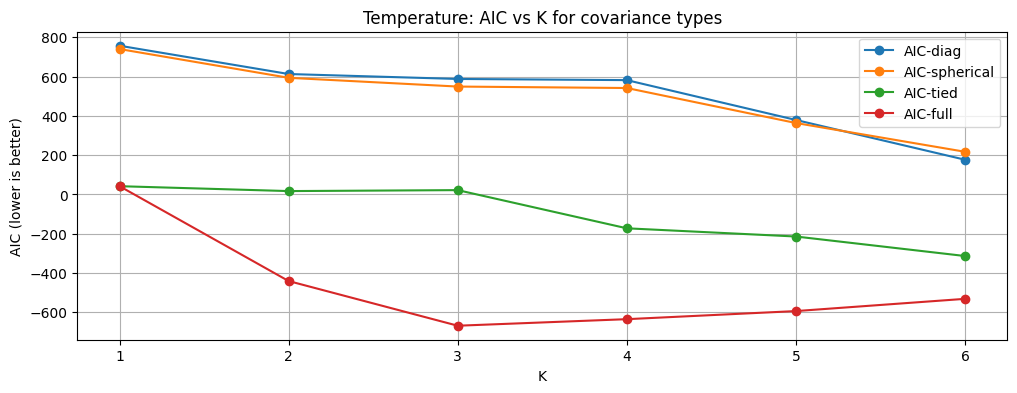

Best by BIC: cov=full, K=3, BIC=-475.8


In [76]:
cov_types = ['diag', 'spherical', 'tied', 'full']
Ks = list(range(1, 7))

bic_table = {cov: [] for cov in cov_types}
aic_table = {cov: [] for cov in cov_types}

for cov in cov_types:
    for K in Ks:
        gm = GaussianMixture(n_components=K, covariance_type=cov, random_state=RANDOM_STATE)
        gm.fit(x1)
        bic_table[cov].append(gm.bic(x1))
        aic_table[cov].append(gm.aic(x1))

pl.figure(figsize=(12, 4))
for cov in cov_types:
    pl.plot(Ks, bic_table[cov], 'o-', label=f'BIC-{cov}')
pl.title('Temperature: BIC vs K for covariance types')
pl.xlabel('K')
pl.ylabel('BIC (lower is better)')
pl.legend(); pl.grid(True); pl.show()

pl.figure(figsize=(12, 4))
for cov in cov_types:
    pl.plot(Ks, aic_table[cov], 'o-', label=f'AIC-{cov}')
pl.title('Temperature: AIC vs K for covariance types')
pl.xlabel('K')
pl.ylabel('AIC (lower is better)')
pl.legend(); pl.grid(True); pl.show()

best_cov, best_K, best_bic = None, None, np.inf
for cov in cov_types:
    K_idx = int(np.argmin(bic_table[cov]))
    if bic_table[cov][K_idx] < best_bic:
        best_bic = bic_table[cov][K_idx]
        best_cov = cov
        best_K = Ks[K_idx]
print(f'Best by BIC: cov={best_cov}, K={best_K}, BIC={best_bic:.1f}')

Lower BIC/AIC means a better trade-off between fit and model complexity

3.1.3 Outliers by log-probability

Least probable (outlier) cities:
- Brest: logp=-30.662
- Strasbourg: logp=-23.881
- Toulouse: logp=-21.491
- Lille: logp=-20.625
- Nice: logp=-20.240


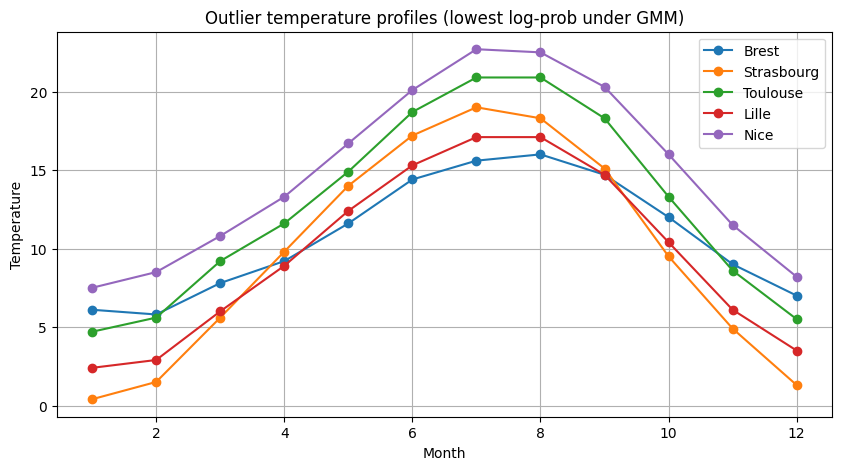

In [77]:
log_probs = gmm_temp.score_samples(x1)
num_outliers = min(5, len(log_probs))
outlier_idx = np.argsort(log_probs)[:num_outliers]

print('Least probable (outlier) cities:')
for idx in outlier_idx:
    print(f'- {villes[idx]}: logp={log_probs[idx]:.3f}')

pl.figure(figsize=(10, 5))
for idx in outlier_idx:
    pl.plot(range(1, 13), x1[idx], 'o-', label=f'{villes[idx]}')
pl.title('Outlier temperature profiles (lowest log-prob under GMM)')
pl.xlabel('Month')
pl.ylabel('Temperature')
pl.legend()
pl.grid(True)
pl.show()

These are least likely under the mixture; unusual seasonality or extremes lower likelihood.

3.1.4 Sample from the fitted GMM


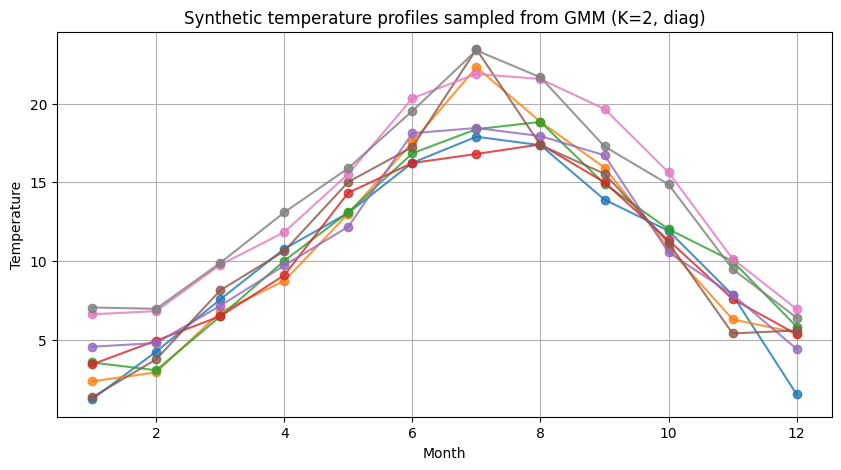

In [78]:
num_samples = 8
samples, _ = gmm_temp.sample(num_samples)

pl.figure(figsize=(10, 5))
for i in range(num_samples):
    pl.plot(range(1, 13), samples[i], 'o-', alpha=0.8)
pl.title('Synthetic temperature profiles sampled from GMM (K=2, diag)')
pl.xlabel('Month')
pl.ylabel('Temperature')
pl.grid(True)
pl.show()
